In [9]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

### 数据


In [2]:
def get_origin_data():
    """
    origin data
    """
    # raw data
    eturb_m1_data = pd.read_csv("e:/dev/data-analysis/hp_steam_data/data/eturb_m1_1min_metrics-0817.csv", header = 0, index_col = None)
    eturb_m2_data = pd.read_csv("e:/dev/data-analysis/hp_steam_data/data/eturb_m2_1min_metrics-0817.csv", header = 0, index_col = None)
    boiler_m1_data = pd.read_csv("e:/dev/data-analysis/hp_steam_data/data/boiler_m1_1min_outlet_steam_flow.csv", header = 0, index_col = None)
    boiler_m3_data = pd.read_csv("e:/dev/data-analysis/hp_steam_data/data/boiler_m3_1min_outlet_steam_flow.csv", header = 0, index_col = None)
    steampipeline_p1_data = pd.read_csv("e:/dev/data-analysis/hp_steam_data/data/steampipeline_p1_1min_hp_steam_pressure.csv", header = 0, index_col = None)
    # data aggregate
    df = pd.DataFrame()
    # eturb_m1
    df["ts"] = pd.to_datetime(eturb_m1_data["ts"])
    df["eturb_m1_steam_flow_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_flow_in"]
    df["eturb_m2_steam_flow_in"] = eturb_m2_data["ExtCondensTurbineOP.steam_flow_in"]
    df["boiler_m1_outlet_steam_flow"] = boiler_m1_data["CFBoilerOP.outlet_steam_flow"]
    df["boiler_m3_outlet_steam_flow"] = boiler_m3_data["CFBoilerOP.outlet_steam_flow"]
    df["steampipeline_p1_hp_steam_pressure"] = steampipeline_p1_data["SteamPipelineOP.hp_steam_pressure"]
    df["boiler_steam_flow"] = df["boiler_m1_outlet_steam_flow"] + df["boiler_m3_outlet_steam_flow"]
    df["turbine_steam_flow"] = df["eturb_m1_steam_flow_in"] + df["eturb_m2_steam_flow_in"]
    df["steam_delta_boiler_turbine"] = df["turbine_steam_flow"] - df["boiler_steam_flow"]
    df = df.reset_index(drop = True)
    df.sort_values("ts", inplace = True)
    
    return df

df = get_origin_data()
df.head()

,ts,eturb_m1_steam_flow_in,eturb_m2_steam_flow_in,boiler_m1_outlet_steam_flow,boiler_m3_outlet_steam_flow,steampipeline_p1_hp_steam_pressure,boiler_steam_flow,turbine_steam_flow,steam_delta_boiler_turbine
0,2020-08-17 00:00:00,81.777500,74.628333,76.900000,76.150000,3.073333,153.050000,156.405833,3.355833
1,2020-08-17 00:01:00,82.250833,74.585833,77.316667,76.258333,3.069167,153.575000,156.836667,3.261667
2,2020-08-17 00:02:00,83.362500,74.417500,78.016667,76.741667,3.052500,154.758333,157.780000,3.021667
3,2020-08-17 00:03:00,82.611667,74.345833,77.500000,76.708333,3.046667,154.208333,156.957500,2.749167
4,2020-08-17 00:04:00,82.699167,74.138333,77.183333,76.766667,3.046667,153.950000,156.837500,2.887500


## 散点图 API

In [24]:
def scatter_plot(df, xlabel, *ylabels, imgpath = None):
    fig, axs = plt.subplots(figsize = (10, 7), sharey = True, tight_layout = True)
    for ylabel in ylabels:
        plt.scatter(df[xlabel], df[ylabel], label = ylabel)
    plt.title("%s VS %s" % (xlabel, ylabel))
    plt.xlabel("%s" % xlabel)
#     plt.ylabel("%s" % ylabel)
    plt.legend()
    if imgpath:
        plt.savefig(imgpath)
    plt.show()

### 1.高压蒸汽压力与高压蒸汽量差值散点图

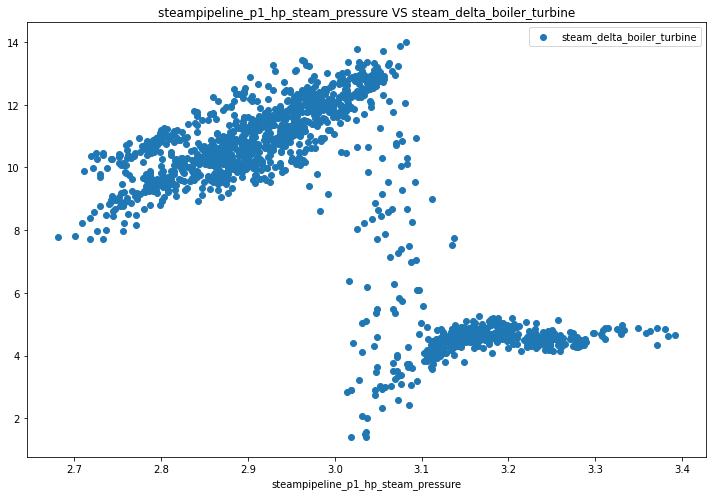

In [25]:
scatter_plot(df, "steampipeline_p1_hp_steam_pressure", "steam_delta_boiler_turbine", imgpath = None)

In [26]:
# temp_df = df.loc[df["steampipeline_p1_hp_steam_pressure"] <= 3.1]
# scatter_plot(temp_df, "steampipeline_p1_hp_steam_pressure", "steam_delta_boiler_turbine", imgpath = None)

In [27]:
# temp_df = df.loc[df["steampipeline_p1_hp_steam_pressure"] >= 3.0]
# scatter_plot(temp_df, "steampipeline_p1_hp_steam_pressure", "steam_delta_boiler_turbine", imgpath = None)

### 2.高压蒸汽压力与锅炉、汽机蒸汽流量散点图

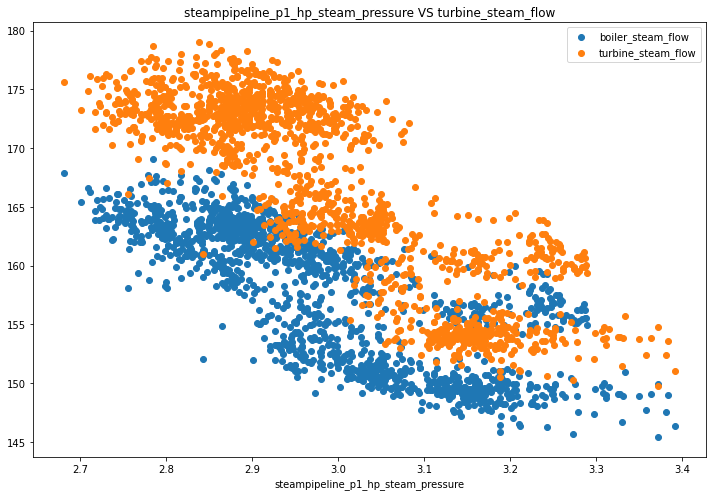

In [28]:
scatter_plot(df, "steampipeline_p1_hp_steam_pressure", "boiler_steam_flow", "turbine_steam_flow", imgpath = None)

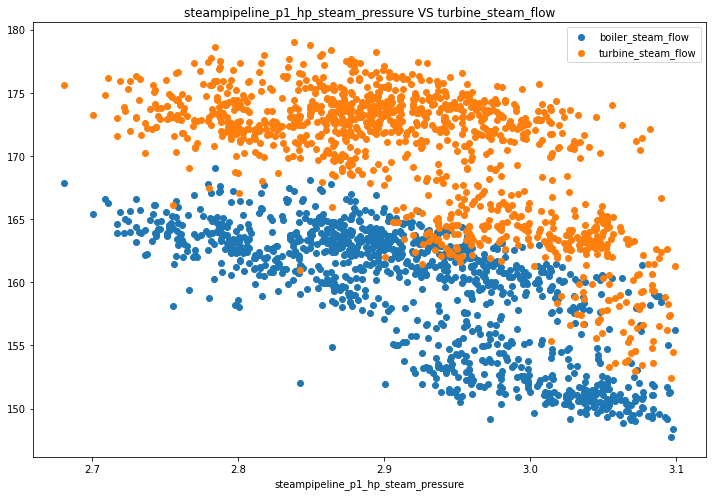

In [29]:
temp_df = df.loc[df["steampipeline_p1_hp_steam_pressure"] <= 3.1]
scatter_plot(temp_df, "steampipeline_p1_hp_steam_pressure", "boiler_steam_flow", "turbine_steam_flow", imgpath = None)

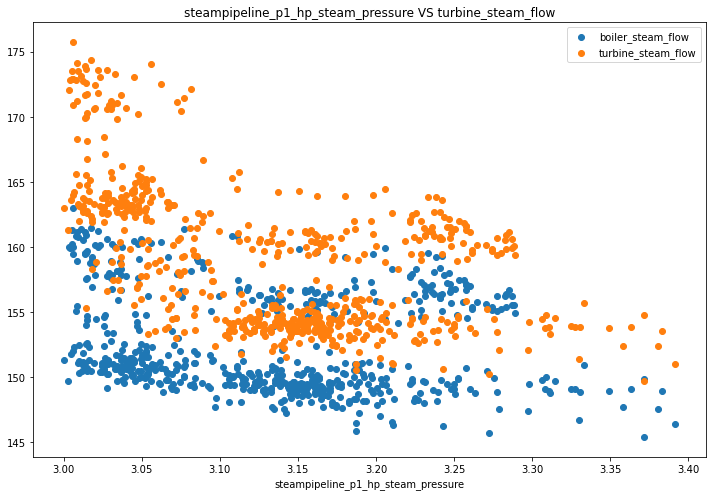

In [30]:
temp_df = df.loc[df["steampipeline_p1_hp_steam_pressure"] >= 3.0]
scatter_plot(temp_df, "steampipeline_p1_hp_steam_pressure", "boiler_steam_flow", "turbine_steam_flow", imgpath = None)

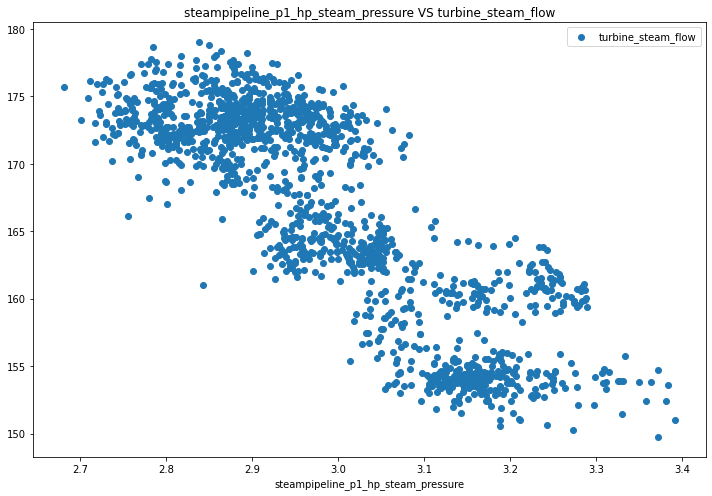

In [34]:
scatter_plot(df, "steampipeline_p1_hp_steam_pressure", "turbine_steam_flow", imgpath = None)

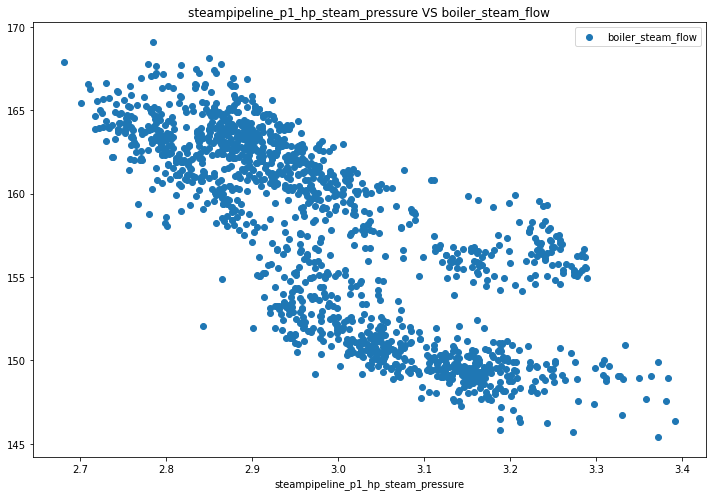

In [35]:
scatter_plot(df, "steampipeline_p1_hp_steam_pressure", "boiler_steam_flow", imgpath = None)